In [1]:
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.regularizers import l2
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('0421_travel.xlsx')

In [3]:
data = np.array(data)
data = data.flatten()
data = data.astype(float)

In [4]:
Number = []
Acf = []
for i in range(6,19):
    Number.append(i)
    acf = pd.Series(data).autocorr(lag=i)
    Acf.append(acf)

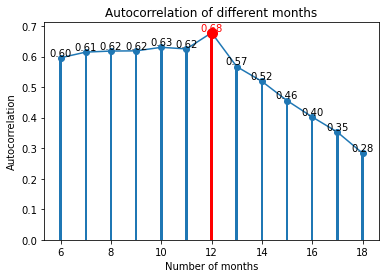

In [5]:
###Visualization for the autocorrelation
import matplotlib.pyplot as plt
bar_width = 0.1  # 设置柱子的宽度
marker_size = 10
x = Number
y = Acf
plt.bar(x, y, width=bar_width)  # 绘制柱状图
plt.plot(x, y, linestyle='-', marker='o')  # 绘制折线图
plt.scatter(x, y, s=marker_size)  # 绘制数据点散点图

# 修改的部分开始
for i in range(len(x)):
    if x[i] == 12:
        plt.bar(x[i], y[i], color='red', width=bar_width)
        plt.plot(x[i], y[i], 'ro', markersize=marker_size)
        plt.scatter(x[i], y[i], color='red', s=marker_size)
        plt.text(x[i], y[i], f'{y[i]:.2f}', ha='center', va='bottom', color='red')
    else:
        plt.text(x[i], y[i], f'{y[i]:.2f}', ha='center', va='bottom')
# 修改的部分结束

plt.xlabel('Number of months')  # 设置X轴标签
plt.ylabel('Autocorrelation')  # 设置Y轴标签
plt.title('Autocorrelation of different months')  # 设置标题

plt.show()  # 显示图形

In [6]:
#####This model result was from the model document
valid_lstm = pd.read_excel('baseline_test.xlsx')
valid_transformer = pd.read_excel('transformer_test.xlsx')
y_val = data[293:347]
valid_lstm= np.array(valid_lstm)
valid_transformer= np.array(valid_transformer)
y_val= np.array(y_val)
y_val = y_val.reshape(len(y_val),1)



In [7]:
#calculate the mape criterion
mape_lstm = 1 - np.mean(np.absolute(valid_lstm - y_val)/y_val)
mape_transformer = 1 - np.mean(np.absolute(valid_transformer - y_val)/y_val)

In [8]:
#generate the test time_list from 2015-07 to 2019-10
from datetime import datetime
from dateutil.relativedelta import relativedelta

start_date = datetime.strptime("2015-07", "%Y-%m")
end_date = datetime.strptime("2019-10", "%Y-%m")

date_list = []
current_date = start_date

while current_date <= end_date:
    date_list.append(current_date.strftime("%Y-%m"))
    current_date += relativedelta(months=3)
for date in date_list:
    print(date)

2015-07
2015-10
2016-01
2016-04
2016-07
2016-10
2017-01
2017-04
2017-07
2017-10
2018-01
2018-04
2018-07
2018-10
2019-01
2019-04
2019-07
2019-10


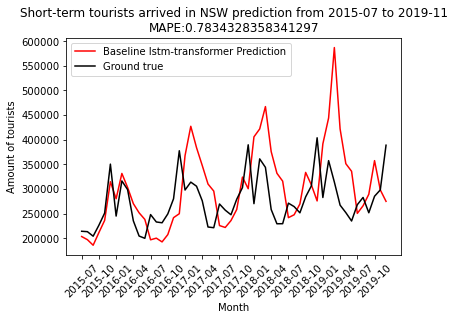

In [9]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the line chart
ax.plot(valid_lstm, label="Baseline lstm-transformer Prediction", color='r')
ax.plot(y_val, label="Ground true", color='k')

# Set the x-axis label
ax.set_xlabel('Month')

# Set the y-axis label
ax.set_ylabel('Amount of tourists')

# Set the chart title
ax.set_title('Short-term tourists arrived in NSW prediction from 2015-07 to 2019-11\nMAPE:'+str(mape_lstm))

# Set the x-axis tick positions and labels
x_ticks = np.arange(0, len(y_val), 3)
x_labels = date_list
plt.xticks(x_ticks, x_labels, rotation=45)

# Add legend
ax.legend()
label_pos1 = (5, 200)  # Example position for the first label
label_pos2 = (10, 250)  # Example position for the second label

# Add labels at fixed positions using the annotate function
ax.annotate("Label 1", xy=label_pos1, xytext=(label_pos1[0], label_pos1[1] + 50),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate("Label 2", xy=label_pos2, xytext=(label_pos2[0], label_pos2[1] - 50),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the chart
plt.show()

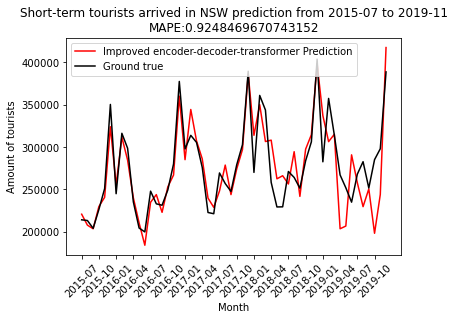

In [10]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the line chart
ax.plot(valid_transformer, label="Improved encoder-decoder-transformer Prediction", color='r')
ax.plot(y_val, label="Ground true", color='k')

# Set the x-axis label
ax.set_xlabel('Month')

# Set the y-axis label
ax.set_ylabel('Amount of tourists')

# Set the chart title
ax.set_title('Short-term tourists arrived in NSW prediction from 2015-07 to 2019-11\nMAPE:'+str(mape_transformer))

# Set the x-axis tick positions and labels
x_ticks = np.arange(0, len(y_val), 3)
x_labels = date_list
plt.xticks(x_ticks, x_labels, rotation=45)

# Add legend
ax.legend()
label_pos1 = (5, 200)  # Example position for the first label
label_pos2 = (10, 250)  # Example position for the second label

# Add labels at fixed positions using the annotate function
ax.annotate("Label 1", xy=label_pos1, xytext=(label_pos1[0], label_pos1[1] + 50),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate("Label 2", xy=label_pos2, xytext=(label_pos2[0], label_pos2[1] - 50),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the chart
plt.show()